# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
# We are being asked to identify the main features a.k.a independent 
# variables (as measured and provided in the data set) that affect the 
# target variable which is the price of the used car.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
#1. Load the raw data and review to get a sense of the data 
# -- quantitywise and qualitywise.

In [ ]:
#2. See what corrections are needed -- check for NaNs, wrong values 
#  (that are out of a realistic range), and consistency

In [ ]:
#3. Get a sense of the data and familiarize yourself with it 
# -- get unique values for columns, group by counts, notna(), etc.

In [23]:
#Import all the required libraries and functions
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import get_scorer_names

In [24]:
# from warnings import filterwarnings 
# filterwarnings('ignore')

In [25]:
#pull the data into a DataFrame
df = pd.read_csv('data/vehicles.csv')
df  #.shape = 426880 rows × 18 columns

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [26]:
#review the count of not null values in the DataFrame
df.info()
# cols with NaN values -- 
#  3   year          425675 non-null  float64
#  4   manufacturer  409234 non-null  object 
#  5   model         421603 non-null  object 
#  6   condition     252776 non-null  object 
#  7   cylinders     249202 non-null  object 
#  8   fuel          423867 non-null  object 
#  9   odometer      422480 non-null  float64
#  10  title_status  418638 non-null  object 
#  11  transmission  424324 non-null  object 
#  12  VIN           265838 non-null  object 
#  13  drive         296313 non-null  object 
#  14  size          120519 non-null  object 
#  15  type          334022 non-null  object 
#  16  paint_color   296677 non-null  object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [6]:
#Do a describe to get the mean, min, and max of the raw data
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [66]:
# Check for outliers 
pd.set_option('display.max_rows', 100)
df.query("price > 400000") #72 rows 
df[['price', 'manufacturer']].query("price > 400000 and manufacturer in ('ferrari', 'mercedes-benz')").groupby('manufacturer').count()  #1 ferrari and 3 Mercedes

,price
manufacturer,
ferrari,1
mercedes-benz,3


In [68]:
# Check for outliers where price < 1000
pd.set_option('display.max_rows', 100)
df.query("price < 1000") #46315  rows -- DROP THESE
df.query("price > 75000") #2297  rows -- DROP THESE

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
10,7218893038,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
11,7218325704,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
12,7217788283,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
13,7217147606,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
14,7209027818,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,7303347225,wyoming,0,2018.0,NaN,peterbilt 579,NaN,NaN,diesel,1.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426812,7302877815,wyoming,0,2006.0,toyota,scion tc,excellent,4 cylinders,gas,195000.0,clean,automatic,JTKDE177460109655,fwd,NaN,NaN,silver,wy
426832,7302353283,wyoming,0,2004.0,toyota,prius,excellent,4 cylinders,hybrid,239000.0,clean,automatic,JTDKB20U840108051,fwd,NaN,NaN,blue,wy
426836,7302301268,wyoming,0,2018.0,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,3C6UR5HL3JG307217,4wd,full-size,truck,white,wy


In [69]:
#get the unique values for all the columns
for col in df.columns:
    if col not in ('id', 'VIN', 'region', 'year'):
        print(f'{col} unique values: {df[col].unique()}')

price unique values: [ 6000 11900 21000 ...  6328 19853 17873]
manufacturer unique values: [nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']
model unique values: [nan 'sierra 1500 crew cab slt' 'silverado 1500' ... 'gand wagoneer'
 '96 Suburban' 'Paige Glenbrook Touring']
condition unique values: [nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']
cylinders unique values: [nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']
fuel unique values: [nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
odometer unique values: [    nan  57923.  71229. ... 172511.  94964.  268

In [70]:
#get the NaN value count for all the columns
for col in df.columns:
    if col not in ('id', 'region', 'price', 'state'):
        print(f'{col} NaN count: {df[col].isna().sum()}')

year NaN count: 1205
manufacturer NaN count: 17646
model NaN count: 5277
condition NaN count: 174104
cylinders NaN count: 177678
fuel NaN count: 3013
odometer NaN count: 4400
title_status NaN count: 8242
transmission NaN count: 2556
VIN NaN count: 161042
drive NaN count: 130567
size NaN count: 306361
type NaN count: 92858
paint_color NaN count: 130203


In [9]:
#get the unique value counts for some of the categorical columns
for col in df.columns:
    if col not in ('id', 'VIN', 'region', 'year', 'price', 'state'):
        print(f'{col} unique values: {df.groupby(col, dropna=False).size()}')
# model values seem to be wrong  -- size(): 29650

manufacturer unique values: manufacturer
acura               5978
alfa-romeo           897
aston-martin          24
audi                7573
bmw                14699
buick               5501
cadillac            6953
chevrolet          55064
chrysler            6031
datsun                63
dodge              13707
ferrari               95
fiat                 792
ford               70985
gmc                16785
harley-davidson      153
honda              21269
hyundai            10338
infiniti            4802
jaguar              1946
jeep               19014
kia                 8457
land rover            21
lexus               8200
lincoln             4220
mazda               5427
mercedes-benz      11817
mercury             1184
mini                2376
mitsubishi          3292
morgan                 3
nissan             19067
pontiac             2288
porsche             1384
ram                18342
rover               2113
saturn              1090
subaru              9495
tesla    

In [71]:
df.dropna().count()   ## 34868 only if all NaNs are dropped. 
#So drop indiv. columms first and then do a dropna

id              34868
region          34868
price           34868
year            34868
manufacturer    34868
model           34868
condition       34868
cylinders       34868
fuel            34868
odometer        34868
title_status    34868
transmission    34868
VIN             34868
drive           34868
size            34868
type            34868
paint_color     34868
state           34868
dtype: int64

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [ ]:
# Assess and drop, replace, fill in, or dropna Columns

# columns to drop - not useful for preduction: VIN, region, state, 
# columns to drop or replace - too many NaNs?: size??, drive, 
# Maybe fill in the mean for these columns as they would be needed to determine price: condition, cylinders
# too important to not have (and small enough to dropna? check): year, manufacturer, model, fuel, odometer, title_status
#   , transmission
#  

In [ ]:
#get the values for some of the columns
data[['paint_color']].groupby('paint_color', dropna=False).size()
# black      62861
# blue       31223
# brown       6593
# custom      6700
# green       7343
# grey       24416
# orange      1984
# purple       687
# red        30473
# silver     42970
# white      79285
# yellow      2142
# NaN       130203

data[['cylinders']].groupby('cylinders', dropna=False).size()
# 10 cylinders      1455
# 12 cylinders       209
# 3 cylinders        655
# 4 cylinders      77642
# 5 cylinders       1712
# 6 cylinders      94169
# 8 cylinders      72062
# other             1298
# NaN             177678  -- fill it all with 4 cylinders? NO DROP THIS COLUMN AS MOST VALUES ARE NaNs

data[['condition']].groupby('condition', dropna=False).size()
# excellent    101467
# fair           6769
# good         121456
# like new      21178
# new            1305
# salvage         601
# NaN          174104  -- fill it all with good? -- NO DROP THIS COLUMN AS MOST VALUES ARE NaNs

data[['drive']].groupby('drive', dropna=False).size()
# 4wd    131904
# fwd    105517
# rwd     58892
# NaN    130567  -- fill it all with fwd, the most common? NO DROP THIS COLUMN AS MOST VALUES ARE NaNs

data[['size']].groupby('size', dropna=False).size()
# compact         19384
# full-size       63465
# mid-size        34476
# sub-compact      3194
# NaN            306361 -- fill it all with mid-size? NO DROP THIS COLUMN AS MOST VALUES ARE NaNs

In [27]:
#column drops combined below based on decisions taken earlier in this ipynb
data2 = df.drop(columns=['VIN', 'region', 'state', 'size', 'cylinders', 'condition', 'drive'])
data2  #426880 rows × 11 columns

,id,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,paint_color
0,7222695916,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7218891961,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7221797935,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7222270760,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7210384030,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,23590,2019.0,nissan,maxima s sedan 4d,gas,32226.0,clean,other,sedan,NaN
426876,7301591187,30590,2020.0,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,red
426877,7301591147,34990,2020.0,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,white
426878,7301591140,28990,2018.0,lexus,es 350 sedan 4d,gas,30112.0,clean,other,sedan,silver


In [28]:
data2.dropna().count() #252977 after drops. Dataset good enough now. 
#Next ieration could be done with replacing some of the NaN values
# For example, paint_color NaNs could be replaced with 'white'
# values = {"paint_color": 'white'}
# data2 = data.fillna(value=values)
# Not liking the fact that we are warping the data set by replacing paint_color column NaNs with 'white'. 
#  So dropping NaNs from there

id              252977
price           252977
year            252977
manufacturer    252977
model           252977
fuel            252977
odometer        252977
title_status    252977
transmission    252977
type            252977
paint_color     252977
dtype: int64

In [29]:
data3 = data2.dropna()
data3 #252977 rows × 11 columns

,id,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,paint_color
27,7316814884,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,white
28,7316814758,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,blue
29,7316814989,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,red
30,7316743432,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,red
31,7316356412,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,black
...,...,...,...,...,...,...,...,...,...,...,...
426873,7301591202,30990,2018.0,mercedes-benz,glc 300 sport,gas,15080.0,clean,automatic,other,white
426874,7301591199,33590,2018.0,lexus,gs 350 sedan 4d,gas,30814.0,clean,automatic,sedan,white
426876,7301591187,30590,2020.0,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,red
426877,7301591147,34990,2020.0,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,white


In [30]:
#to clear out wrong and outlier values from the data set
#  get the unique values for all the columns and review them
for col in data3.columns:
    if col not in ('id', 'VIN', 'region', 'year'):
        print(f'{col} unique values: {data3[col].unique()}')

price unique values: [33590 22590 39590 ...  8179  4760  6328]
manufacturer unique values: ['gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'cadillac'
 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo' 'infiniti'
 'lincoln' 'acura' 'hyundai' 'mercedes-benz' 'audi' 'bmw' 'mitsubishi'
 'subaru' 'alfa-romeo' 'volkswagen' 'mazda' 'porsche' 'kia' 'ferrari'
 'pontiac' 'fiat' 'rover' 'tesla' 'saturn' 'mini' 'mercury'
 'harley-davidson' 'datsun' 'land rover' 'aston-martin']
model unique values: ['sierra 1500 crew cab slt' 'silverado 1500' 'silverado 1500 crew' ...
 'cj 3a willys' 'rx& gls sport' 'gand wagoneer']
fuel unique values: ['gas' 'other' 'diesel' 'hybrid' 'electric']
odometer unique values: [ 57923.  71229.  19160. ... 172511. 163837.  69550.]
title_status unique values: ['clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
transmission unique values: ['other' 'automatic' 'manual']
type unique values: ['pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-va

In [76]:
#checking data to confirm that NaNs are gone
pd.set_option('display.max_rows', 20)
data3[['manufacturer']].groupby('manufacturer', dropna=False).size().sort_values().head(20)
data3[['manufacturer']].groupby('manufacturer', dropna=False).size().sort_values()

manufacturer
land rover             8
aston-martin          13
datsun                32
ferrari               48
harley-davidson       61
                   ...  
nissan             11879
honda              13374
toyota             21620
chevrolet          33090
ford               42561
Length: 41, dtype: int64

In [77]:
# NO DATA CHANGE DONE HERE -- Check for outliers where price > 400,000
pd.set_option('display.max_rows', 20)
data3.query("price > 400000") #14 rows 
data3.query("price > 300000") #19 rows  #Except for one Porche all prices looked wrong

,id,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,paint_color
29386,7305265540,1111111111,1999.0,ford,f350 super duty lariat,diesel,149000.0,clean,automatic,pickup,white
68935,7302895209,2000000,2002.0,saturn,l-series l200 4dr sedan,gas,164290.0,clean,automatic,sedan,green
88588,7316152381,304995,2021.0,porsche,911,gas,22.0,clean,automatic,convertible,white
90274,7314029754,304995,2021.0,porsche,911,gas,22.0,clean,automatic,convertible,white
95119,7311936036,990000,2017.0,mercedes-benz,amg g 63,gas,4085.0,clean,automatic,SUV,white
136516,7316047597,17000000,2007.0,ram,2500,diesel,170000.0,rebuilt,automatic,pickup,black
137807,7314339777,123456789,1999.0,buick,regal,gas,96000.0,clean,automatic,sedan,white
155421,7308748768,1234567,2006.0,jeep,wrangler,gas,123456.0,clean,automatic,SUV,custom
193736,7315524207,123456789,2015.0,chevrolet,cruze,gas,64181.0,clean,automatic,sedan,red
194292,7307876060,1234567,2010.0,lincoln,mkt ecoboost,gas,85653.0,clean,automatic,SUV,custom


In [31]:
# Check for outliers where odometer = 0 or > 400,000 and removing them from data3
pd.set_option('display.max_rows', 20)
data3.query("odometer > 400000") #417 rows 
data3a = data3.query("odometer > 1000 and odometer < 200000")
data3a #236278 rows × 11 columns

,id,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,paint_color
27,7316814884,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,white
28,7316814758,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,blue
29,7316814989,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,red
30,7316743432,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,red
31,7316356412,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,black
...,...,...,...,...,...,...,...,...,...,...,...
426873,7301591202,30990,2018.0,mercedes-benz,glc 300 sport,gas,15080.0,clean,automatic,other,white
426874,7301591199,33590,2018.0,lexus,gs 350 sedan 4d,gas,30814.0,clean,automatic,sedan,white
426876,7301591187,30590,2020.0,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,red
426877,7301591147,34990,2020.0,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,white


In [32]:
# Check for outliers where price < 1,000 and > 50000
pd.set_option('display.max_rows', 20)
data3a.query("price == 0") #23209 rows 
data3a.query("price > 1000 or price > 75000") #231184 rows × 11 columns
# removing the rows with price outliers
data4 = data3a.query("price >1000 and price < 75000")
data4 #215905 rows × 11 columns

,id,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type,paint_color
27,7316814884,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup,white
28,7316814758,22590,2010.0,chevrolet,silverado 1500,gas,71229.0,clean,other,pickup,blue
29,7316814989,39590,2020.0,chevrolet,silverado 1500 crew,gas,19160.0,clean,other,pickup,red
30,7316743432,30990,2017.0,toyota,tundra double cab sr,gas,41124.0,clean,other,pickup,red
31,7316356412,15000,2013.0,ford,f-150 xlt,gas,128000.0,clean,automatic,truck,black
...,...,...,...,...,...,...,...,...,...,...,...
426873,7301591202,30990,2018.0,mercedes-benz,glc 300 sport,gas,15080.0,clean,automatic,other,white
426874,7301591199,33590,2018.0,lexus,gs 350 sedan 4d,gas,30814.0,clean,automatic,sedan,white
426876,7301591187,30590,2020.0,volvo,s60 t5 momentum sedan 4d,gas,12029.0,clean,other,sedan,red
426877,7301591147,34990,2020.0,cadillac,xt4 sport suv 4d,diesel,4174.0,clean,other,hatchback,white


In [9]:
data4.describe()

,id,price,year,odometer
count,2.159050e+05,215905.000000,215905.000000,215905.000000
mean,7.311417e+09,20352.831254,2012.369246,82548.386397
std,4.403105e+06,13314.320734,7.716591,52283.384696
min,7.301583e+09,1012.000000,1900.000000,1001.000000
25%,7.308028e+09,9200.000000,2010.000000,35035.000000
50%,7.312421e+09,17900.000000,2014.000000,79296.000000
75%,7.315205e+09,28995.000000,2017.000000,123365.000000
max,7.317101e+09,74999.000000,2022.000000,199999.000000


In [33]:
for col in data4.columns:
    if col in ('manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'type', 'paint_color'):
                print(f'{col} unique values: {data4[col].value_counts()}')
#         print(f'{col} unique values: {data4[col].unique()}')

#model has too many values. Dropping it.
data4 = data4.drop(columns=['model'], axis=1)

manufacturer unique values: manufacturer
ford               35381
chevrolet          27508
toyota             17857
honda              11131
nissan             10336
                   ...  
harley-davidson       41
datsun                27
land rover             8
aston-martin           8
ferrari                3
Name: count, Length: 41, dtype: int64
model unique values: model
f-150                               3998
silverado 1500                      2566
1500                                1868
civic                               1548
accord                              1525
                                    ... 
f-150 xlt 4d supercrew automatic       1
525i sedan                             1
xts 4dr fwd                            1
a7 premium quattro sedan 4d            1
gand wagoneer                          1
Name: count, Length: 14707, dtype: int64
fuel unique values: fuel
gas         182266
other        19290
diesel       10289
hybrid        3024
electric      1036
Name: c

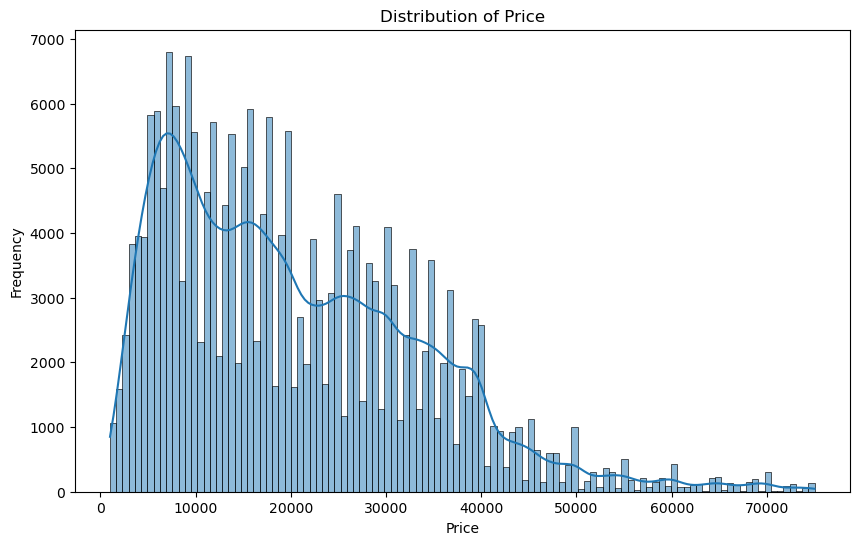

In [97]:
#do a histogram of price in the dataset that has been prepared.
pd.option_context('mode.use_inf_as_na', True)
plt.figure(figsize=(10, 6))
sns.histplot(data4['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show() #Normal distribution (with a long tail if values up to 300K was used).

In [34]:
#make Id the Index and drop the id column
data5 = data4.set_index(data4['id']).drop(columns=['id'])
data5

,price,year,manufacturer,fuel,odometer,title_status,transmission,type,paint_color
id,,,,,,,,,
7316814884,33590,2014.0,gmc,gas,57923.0,clean,other,pickup,white
7316814758,22590,2010.0,chevrolet,gas,71229.0,clean,other,pickup,blue
7316814989,39590,2020.0,chevrolet,gas,19160.0,clean,other,pickup,red
7316743432,30990,2017.0,toyota,gas,41124.0,clean,other,pickup,red
7316356412,15000,2013.0,ford,gas,128000.0,clean,automatic,truck,black
...,...,...,...,...,...,...,...,...,...
7301591202,30990,2018.0,mercedes-benz,gas,15080.0,clean,automatic,other,white
7301591199,33590,2018.0,lexus,gas,30814.0,clean,automatic,sedan,white
7301591187,30590,2020.0,volvo,gas,12029.0,clean,other,sedan,red


In [35]:
data5.duplicated().value_counts()  #True      97420 duplicates found   #118485 not duplicates

False    118485
True      97420
Name: count, dtype: int64

In [36]:
#remove duplicates and then use data5 for analysis
data6 = data5.drop_duplicates()
data6 #118485 rows × 9 columns

,price,year,manufacturer,fuel,odometer,title_status,transmission,type,paint_color
id,,,,,,,,,
7316814884,33590,2014.0,gmc,gas,57923.0,clean,other,pickup,white
7316814758,22590,2010.0,chevrolet,gas,71229.0,clean,other,pickup,blue
7316814989,39590,2020.0,chevrolet,gas,19160.0,clean,other,pickup,red
7316743432,30990,2017.0,toyota,gas,41124.0,clean,other,pickup,red
7316356412,15000,2013.0,ford,gas,128000.0,clean,automatic,truck,black
...,...,...,...,...,...,...,...,...,...
7302963273,18000,1990.0,jeep,gas,114400.0,clean,automatic,SUV,black
7302487327,21990,2016.0,bmw,other,26599.0,clean,automatic,sedan,blue
7302384818,9800,1985.0,nissan,gas,115000.0,clean,automatic,hatchback,red


In [37]:
# oneHotEncode the remaining Categorical columns and save it as data5 DataFrame
column_trans = make_column_transformer(
    (OneHotEncoder(sparse=False, drop='first'), \
     ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'paint_color']),
    remainder='passthrough')
data7 = pd.DataFrame(column_trans.fit_transform(data6), columns=column_trans.get_feature_names_out())

In [39]:
data7.shape #(118485, 77)
data7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118485 entries, 0 to 118484
Data columns (total 77 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   onehotencoder__manufacturer_alfa-romeo       118485 non-null  float64
 1   onehotencoder__manufacturer_aston-martin     118485 non-null  float64
 2   onehotencoder__manufacturer_audi             118485 non-null  float64
 3   onehotencoder__manufacturer_bmw              118485 non-null  float64
 4   onehotencoder__manufacturer_buick            118485 non-null  float64
 5   onehotencoder__manufacturer_cadillac         118485 non-null  float64
 6   onehotencoder__manufacturer_chevrolet        118485 non-null  float64
 7   onehotencoder__manufacturer_chrysler         118485 non-null  float64
 8   onehotencoder__manufacturer_datsun           118485 non-null  float64
 9   onehotencoder__manufacturer_dodge            118485 non-nul

In [40]:
#Prepare X and Y, and them split them into Training and Test datasets
X = data7.drop('remainder__price', axis=1)
y = data7['remainder__price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#review the data in X_train
X_train  #94788 rows × 76 columns ($1K to $75K)  

,onehotencoder__manufacturer_alfa-romeo,onehotencoder__manufacturer_aston-martin,onehotencoder__manufacturer_audi,onehotencoder__manufacturer_bmw,onehotencoder__manufacturer_buick,onehotencoder__manufacturer_cadillac,onehotencoder__manufacturer_chevrolet,onehotencoder__manufacturer_chrysler,onehotencoder__manufacturer_datsun,onehotencoder__manufacturer_dodge,...,onehotencoder__paint_color_green,onehotencoder__paint_color_grey,onehotencoder__paint_color_orange,onehotencoder__paint_color_purple,onehotencoder__paint_color_red,onehotencoder__paint_color_silver,onehotencoder__paint_color_white,onehotencoder__paint_color_yellow,remainder__year,remainder__odometer
47916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1976.0,149000.0
89748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2018.0,27871.0
59450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016.0,59000.0
93488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017.0,96932.0
45315,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016.0,99000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2012.0,86000.0
110268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011.0,106000.0
103694,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2018.0,70007.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2014.0,150710.0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [42]:
# Initialize models. Source attribution -- CODE FROM OFFICE HOUR MODIFIED AND USED.
models = {
    'Linear Regression': LinearRegression(),
     'Ridge Regression': Ridge(),
     'Lasso Regression': Lasso(),
}

In [43]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")
#Linear Regression and Ridge Regression seem slightly better than Lasson Regression

Linear Regression: RMSE = 7499.5280, R2 = 0.6275
Ridge Regression: RMSE = 7500.3373, R2 = 0.6274
Lasso Regression: RMSE = 7507.0381, R2 = 0.6268


In [44]:
# Define the parameter grid for Ridge, and Lasso. 
param_grid = {
    'Ridge': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0]},
}

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
}

# Perform cross-validation and hyperparameter tuning
best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid.fit(X_train, y_train)
        best_models[name] = grid.best_estimator_
        best_rmse = np.sqrt(-grid.best_score_)
        print(f"Best {name}: {grid.best_params_}, RMSE = {best_rmse:.4f}")
    else:
        # For Linear Regression, just perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
        best_models[name] = model
        print(f"{name}: Cross-validation RMSE = {rmse_scores.mean():.4f}")

print()
print('Evaluate the best models on the test set')
results = {}
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: Cross-validation RMSE = 7514.8803
Best Ridge: {'alpha': 0.1}, RMSE = 7515.2617
Best Lasso: {'alpha': 0.01}, RMSE = 7515.2487

Evaluate the best models on the test set
Linear Regression: RMSE = 7499.5280, R2 = 0.6275
Ridge: RMSE = 7499.5724, R2 = 0.6275
Lasso: RMSE = 7499.5295, R2 = 0.6275


In [45]:
# Use the best linear model to make predictions
best_lr_model = best_models['Linear Regression']
y_pred = best_lr_model.predict(X_test)

# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_predicted_df.head()

,Actual,Predicted
37749,9900.0,11540.191529
82154,16495.0,21067.891349
40790,4999.0,7743.543079
28241,14995.0,9369.676419
39201,2499.0,17877.814064


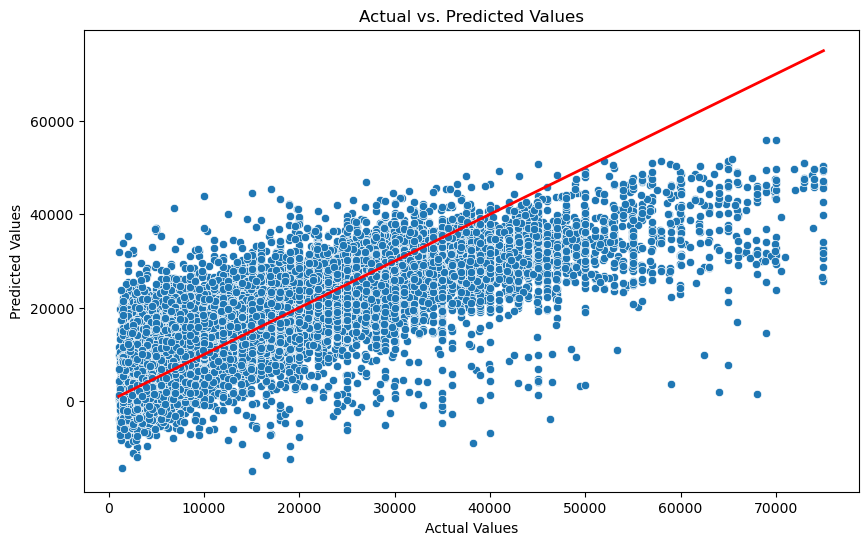

In [46]:
#plot prediction versus actual test data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=actual_vs_predicted_df)
plt.plot([actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
         [actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
         color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [47]:
best_lr_model.coef_

array([ 3.23703956e+03,  2.67770262e+04,  1.31147675e+03,  3.44609112e+02,
       -3.24165068e+03,  1.23608268e+03, -1.46808944e+03, -4.25539083e+03,
        5.73888284e+03, -2.43882065e+03,  3.05169176e+04, -1.00604476e+04,
       -1.77721789e+03,  1.33773436e+03, -1.21001591e+04, -2.26241941e+03,
       -5.21932920e+03,  1.04617784e+03,  1.08492790e+03, -1.57799427e+02,
       -5.84904101e+03,  4.83455751e+03,  3.43986539e+03, -3.16429104e+02,
       -4.47083949e+03,  2.04812367e+03, -2.87219138e+03, -5.72789552e+03,
       -6.68998396e+03, -4.89170517e+03, -1.26180689e+03,  9.76909931e+03,
        2.38877622e+02,  4.73639033e+03, -5.89244721e+03, -1.55696923e+03,
        2.27477079e+04, -2.04017676e+02, -5.24100849e+03, -1.09390063e+03,
       -1.48437532e+04, -1.20760836e+04, -1.23388994e+04, -9.53668155e+03,
        9.06499198e+02, -3.93047424e+03, -1.03749304e+04, -4.95227910e+03,
       -5.59630499e+03,  1.01698452e+03,  1.10026041e+03,  3.07934634e+03,
        1.68101717e+02,  

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [48]:
# reviewing the Output with column names added

pd.set_option('display.max_rows', 100)
#best_lr_model.feature_names_in_
# Get the coefficients and the intercept from the best Lasso model
coefficients = pd.Series(best_lr_model.coef_, index=X_train.columns)
intercept = best_lr_model.intercept_

print("Lasso Regression Coefficients:")
print(abs(coefficients).sort_values(ascending=False), coefficients.sort_values(ascending=False))
print("\nIntercept:", intercept)

Lasso Regression Coefficients:
onehotencoder__manufacturer_ferrari            30516.917594
onehotencoder__manufacturer_aston-martin       26777.026249
onehotencoder__manufacturer_tesla              22747.707862
onehotencoder__fuel_electric                   14843.753166
onehotencoder__fuel_hybrid                     12338.899410
onehotencoder__manufacturer_harley-davidson    12100.159068
onehotencoder__fuel_gas                        12076.083568
onehotencoder__title_status_parts only         10374.930386
onehotencoder__manufacturer_fiat               10060.447586
onehotencoder__manufacturer_porsche             9769.099307
onehotencoder__fuel_other                       9536.681550
onehotencoder__type_pickup                      7351.783452
onehotencoder__type_truck                       7280.940669
onehotencoder__manufacturer_mitsubishi          6689.983959
onehotencoder__manufacturer_saturn              5892.447215
onehotencoder__manufacturer_kia                 5849.041010
onehotenc

In [51]:
%%capture cap  
# Saving the Output of a Cell as a Text File 

pd.set_option('display.max_rows', 100)
#best_lr_model.feature_names_in_
# Get the coefficients and the intercept from the best Lasso model
coefficients = pd.Series(best_lr_model.coef_, index=X_train.columns)
intercept = best_lr_model.intercept_

print("Lasso Regression Coefficients:")
print(abs(coefficients).sort_values(ascending=False), coefficients.sort_values(ascending=False))
print("\nIntercept:", intercept)

# Save the captured output to a text file
with open('output.txt', 'w') as file:
    file.write(cap.stdout)
    
pd.set_option('display.max_rows', 20)

In [72]:
# checking results
data6.query("manufacturer == 'ferrari'")
y[X.query("onehotencoder__manufacturer_ferrari == 1").index]

90360     44150.0
95541     43000.0
114064    35000.0
Name: remainder__price, dtype: float64

In [70]:
#reviewing results
data6.query("fuel == 'diesel'").sort_values('price', ascending=False)

,price,year,manufacturer,fuel,odometer,title_status,transmission,type,paint_color
id,,,,,,,,,
7314477840,74999,2018.0,ford,diesel,29952.0,clean,automatic,truck,black
7316868726,74999,2017.0,ford,diesel,56701.0,clean,automatic,truck,white
7307527095,74999,2018.0,gmc,diesel,24675.0,clean,automatic,truck,black
7308263426,74999,2017.0,ford,diesel,15796.0,clean,automatic,truck,silver
7308297551,74999,2020.0,ford,diesel,22933.0,clean,automatic,truck,white
...,...,...,...,...,...,...,...,...,...
7308256741,1200,1990.0,mercedes-benz,diesel,133000.0,clean,automatic,sedan,brown
7304981799,1200,2000.0,dodge,diesel,150000.0,clean,automatic,mini-van,blue
7313999391,1184,2020.0,gmc,diesel,19122.0,clean,automatic,pickup,red


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.